In [1]:
print("hello World!")

hello World!


In [2]:
# Dependencies
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy.stats as st
import numpy as np
import requests
import time
import gmaps
import json
from pprint import pprint

# Import API key
from config import api_key
from config import g_key

In [3]:
# Study data files
project_path = "Project_df.csv"

# Read the csv file
Project_df = pd.read_csv(project_path)

# Display the data table for preview
Project_df

,Client ID,Town,State,Month,Quarter,Year,Category,Distributor,Min Monthly Sales,Total Sales,Compliance,Total Points,Points Worth ($)
0,2,Tlalnepantla,Ciudad de Mexico,1,1,2018,C4,D5,59000,51951,0.88,0,0.00
1,2,Tlalnepantla,Ciudad de Mexico,2,1,2018,C4,D5,59000,15301,0.26,0,0.00
2,2,Tlalnepantla,Ciudad de Mexico,5,2,2018,C4,D5,59000,19807,0.34,0,0.00
3,2,Tlalnepantla,Ciudad de Mexico,6,2,2018,C4,D5,59000,16916,0.29,0,0.00
4,2,Tlalnepantla,Ciudad de Mexico,8,3,2018,C4,D5,59000,88353,1.50,1080,928.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14579,1371,Colima,Colima,11,4,2020,C4,D12,59000,218149,3.70,164,141.04
14580,1371,Colima,Colima,12,4,2020,C4,D12,59000,119233,2.02,10334,8887.24
14581,1372,Tezontepec,Hidalgo,10,4,2020,C2,D15,23000,26834,1.17,172,147.92
14582,1372,Tezontepec,Hidalgo,11,4,2020,C2,D15,23000,35671,1.55,123,105.78


# Part 1 - Statistical Analysis.

####  We will use statistical analysis to understand our data

In [4]:
# Filtering the data by year to run aggregate function.
gb_year = Project_df.groupby('Year')

Project_18_df = gb_year.get_group(2018)
Project_19_df = gb_year.get_group(2019)
Project_20_df = gb_year.get_group(2020)

In [5]:
# Working with 2018 Data by Category Sales
stats_summary_2018_df = (Project_18_df.groupby("Category")["Total Sales"].agg(["min","max", "sum", "mean","median","var","std","sem"]).style.format('${0:,.2f}'))
stats_summary_2018_df

,min,max,sum,mean,median,var,std,sem
Category,,,,,,,,
C1,$0.00,"$266,897.00","$25,070,191.00","$19,329.37","$15,882.00","$280,700,450.39","$16,754.12",$465.21
C2,$0.00,"$883,310.00","$55,162,763.00","$32,854.53","$28,279.00","$1,099,445,958.73","$33,157.89",$809.21
C3,$319.00,"$250,064.00","$44,206,730.00","$53,197.03","$48,830.00","$883,855,335.33","$29,729.70","$1,031.31"
C4,$0.00,"$714,675.00","$55,260,572.00","$95,441.40","$86,407.00","$3,431,020,736.59","$58,574.92","$2,434.29"
C5,"$2,590.00","$471,584.00","$31,641,029.00","$140,004.55","$139,181.50","$4,078,173,565.60","$63,860.58","$4,247.94"
C6,$0.00,"$1,817,422.00","$106,768,184.00","$311,277.50","$269,100.00","$38,392,288,815.20","$195,939.50","$10,579.74"


In [6]:
# Working with 2019 Data by Category Sales
stats_summary_2019_df = (Project_19_df.groupby("Category")["Total Sales"].agg(["min","max", "sum","mean","median","var","std","sem"]).style.format('${0:,.2f}'))
stats_summary_2019_df

,min,max,sum,mean,median,var,std,sem
Category,,,,,,,,
C1,$0.00,"$128,134.00","$24,038,989.00","$16,133.55","$12,990.00","$170,505,911.32","$13,057.79",$338.28
C2,$0.00,"$494,892.00","$50,900,948.00","$28,888.17","$25,665.00","$533,468,753.33","$23,096.94",$550.24
C3,$0.00,"$276,884.00","$39,043,982.00","$52,128.15","$48,337.00","$970,088,304.31","$31,146.24","$1,138.06"
C4,$0.00,"$498,979.00","$48,892,273.00","$88,572.96","$82,104.50","$3,510,982,398.64","$59,253.54","$2,522.00"
C5,"$1,385.00","$457,897.00","$32,252,683.00","$123,573.50","$122,440.00","$5,222,577,854.33","$72,267.41","$4,473.24"
C6,$341.00,"$1,245,154.00","$102,348,571.00","$308,278.83","$260,843.00","$33,688,378,715.54","$183,543.94","$10,073.28"


In [7]:
# Working with 2020 Data by Category Sales
stats_summary_2020_df = (Project_20_df.groupby("Category")["Total Sales"].agg(["min","max", "sum","mean","median","var","std","sem"]).style.format('${0:,.2f}'))
stats_summary_2020_df

,min,max,sum,mean,median,var,std,sem
Category,,,,,,,,
C1,$0.00,"$209,363.00","$22,184,026.00","$16,780.66","$13,351.50","$234,235,777.25","$15,304.76",$420.93
C2,$0.00,"$280,652.00","$45,200,853.00","$31,854.02","$27,790.00","$551,393,157.08","$23,481.76",$623.36
C3,$688.00,"$458,634.00","$31,610,226.00","$50,902.14","$43,872.00","$1,518,277,993.29","$38,965.09","$1,563.62"
C4,$0.00,"$288,327.00","$41,579,901.00","$72,312.87","$66,679.00","$2,372,719,738.50","$48,710.57","$2,031.37"
C5,$0.00,"$437,069.00","$31,395,872.00","$130,816.13","$123,018.50","$6,809,285,103.14","$82,518.39","$5,326.54"
C6,"$25,628.00","$3,964,935.00","$104,691,580.00","$342,129.35","$269,847.50","$138,748,704,311.53","$372,489.87","$21,293.83"


# Part 2 - Analyzing Data by Number of Clients.

#### We will try to analyze if the Number of Clients has a direct impact on the Total Sales, regardless of their Category 

In [8]:
# We will create a Data Frame with the number of different clients we had for each month of the three years
clients_by_month = Project_df.groupby('Year')

client_no_18 = pd.DataFrame(clients_by_month.get_group(2018))
client_no_18 = client_no_18.groupby('Month').count()[["Client ID"]]
client_no_18 = client_no_18.values.tolist()

client_no_19 = pd.DataFrame(clients_by_month.get_group(2019))
client_no_19 = client_no_19.groupby('Month').count()[["Client ID"]]
client_no_19 = client_no_19.values.tolist()

client_no_20 = pd.DataFrame(clients_by_month.get_group(2020))
client_no_20 = client_no_20.groupby('Month').count()[["Client ID"]]
client_no_20 = client_no_20.values.tolist()

clients_number = client_no_18 + client_no_19 + client_no_20
months = list(range(1, 37))

clients_by_month = pd.DataFrame(clients_number, index = months, columns =['Number of DIfferent Clients']) 
clients_by_month

,Number of DIfferent Clients
1,405
2,391
3,399
4,398
5,399
6,414
7,410
8,422
9,427
10,427


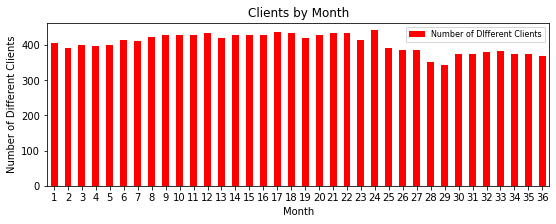

<Figure size 432x288 with 0 Axes>

In [9]:
# Plotting that Data Frame
clients_by_month.plot(kind="bar", color="r", figsize=(9,3))

plt.title("Clients by Month")
plt.xlabel("Month")
plt.ylabel("Number of Different Clients")
plt.legend(loc=1, prop={'size': 8})
plt.xticks(rotation = 0)

plt.show()

plt.savefig("plots/Count of different clients by month.png")

# Acá va la parte de Erick del histograma de las ventas en los 36 meses.

#### Acá va el data frame

#### Acá va el plot 

# Termina la parte de Erick.

In [10]:
# We will compare if Sales and Number of Clients hold a relation
sales_by_month = Project_df.groupby('Year')

total_sales_18 = pd.DataFrame(sales_by_month.get_group(2018))
total_sales_18 = total_sales_18.groupby('Month').sum()[["Total Sales"]]
total_sales_18 = total_sales_18.values.tolist()

total_sales_19 = pd.DataFrame(sales_by_month.get_group(2019))
total_sales_19 = total_sales_19.groupby('Month').sum()[["Total Sales"]]
total_sales_19 = total_sales_19.values.tolist()

total_sales_20 = pd.DataFrame(sales_by_month.get_group(2020))
total_sales_20 = total_sales_20.groupby('Month').sum()[["Total Sales"]]
total_sales_20 = total_sales_20.values.tolist()

total_sales_by_month = total_sales_18 + total_sales_19 + total_sales_20

total_sales = pd.DataFrame(total_sales_by_month, index = months, columns =['Total Sales'])
total_sales["Number of DIfferent Clients"] = clients_by_month["Number of DIfferent Clients"]
total_sales = total_sales.set_index("Number of DIfferent Clients")
total_sales

,Total Sales
Number of DIfferent Clients,
405,26947111
391,23356058
399,26146158
398,24061585
399,25665286
414,27107108
410,27105281
422,26013498
427,22760955


#    TOTAL SALES VS. CLIENTS VOLUME

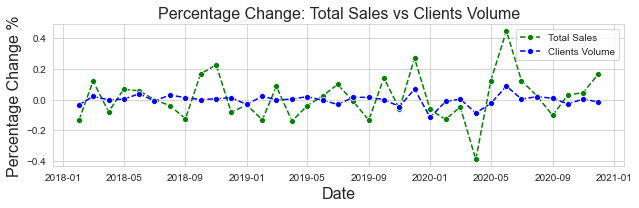

In [19]:
#Converting 'Year' and 'Month' in to a Complete Date Format (m-d-y) 
date_df = Project_df[Project_df['Month']!=24]
date_df['date'] = pd.to_datetime(date_df[['Year','Month']].assign(DAY=1),format="%m-%d-%Y")

#Create a new dataframe based on the new 'date' and create the columns for the count of 'Client ID' and the sum of 'Total Sales'

pct_change_df = date_df.groupby(['date']).agg({'Client ID':'count', 
                                               'Total Sales': 'sum'}).reset_index()
pct_change_df['Clients pctChange'] = pct_change_df['Client ID'].pct_change()
pct_change_df['Total Sales pctChange'] = pct_change_df['Total Sales'].pct_change()

#Create combo chart
fig, ax1 = plt.subplots(figsize = (9,3))
sns.set_style('whitegrid')

#Create lineplot for the 'Total Sales Percentage Change'
s = sns.lineplot(data=pct_change_df, x="date", y="Total Sales pctChange",
             linestyle = 'dashed', marker = 'o', color = 'green', label = 'Total Sales')
#Create lineplot for the 'Clients Volume Percentage Change'
c = sns.lineplot(data=pct_change_df, x="date", y="Clients pctChange",
             linestyle = 'dashed', marker = 'o', color = 'blue', label = 'Clients Volume')
#Set title, label and legend
plt.title('Percentage Change: Total Sales vs Clients Volume', fontsize = 16)
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Percentage Change %', fontsize = 16)
plt.legend(loc='best')

plt.savefig("plots/Percentage Change Total Sales vs Clients Volume.png")
#Show Plot
plt.show()


# Acá va la parte de Erick del histograma de maduración de ventas por cliente.

#### Acá va el data frame

#### Acá va el plot 

# Termina la parte de Erick.

# Part 3 - Analyzing Data by Category.

#### We will try to analyze Sales by Category 

In [ ]:
# Sum the Total Sales by Category
category_sales_df=(pd.DataFrame(Project_df.groupby('Category')[["Total Sales","Points Worth ($)"]].sum()))

#Calculate expense ratio
#We define expense ratio as the cost of the Points Worth divided by the Total Sales
#The objective behind calculating the expense ratio is to compare all categories to see if the percentage of money returned to customer is uniform between categories or if it is different
#Higher ratios indicate more money returned to customers.

category_sales_df["ratio_expense"]=category_sales_df["Points Worth ($)"]/category_sales_df["Total Sales"]*100
category_sales_df

In [ ]:
total_sales=category_sales_df["Total Sales"].sum()
x_axis=np.arange(0, 6, 1)
y_axis=category_sales_df["ratio_expense"]

plt.title("Expense ratio by category")
plt.xlabel("Category")
plt.ylabel("Expense Ratio")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["C1","C2","C3","C4","C5","C6"], rotation="horizontal")


# Have to plot our chart once again as it doesn't stick after being shown
plt.plot(x_axis, y_axis)

plt.ylim(0, 5)  
plt.show()

plt.savefig("plots/Expense ratio comparison by category.png")

In [ ]:
total_sales=category_sales_df["Total Sales"].sum()
sales_category=category_sales_df["Total Sales"]/total_sales*100
sales_category
names_category= ["C1","C2","C3","C4","C5","C6"]

# The colors of each section of the pie chart
colors = ["grey", "lightgreen", "cornflowerblue", "lightskyblue","red", "pink"]


explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.1)


plt.pie(sales_category, explode=explode, labels=names_category, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Percentage of sales by category")

plt.savefig("plots/Sales percentage by category.png")

In [ ]:
# Getting the min Monthly Sales by Category
min_sales_by_category = Project_df.drop_duplicates("Category").sort_values("Category", ascending= True)[["Category", "Min Monthly Sales"]].set_index('Category')
min_sales_by_category

In [ ]:
# Comparing Compliance
category_com = Project_df.groupby(['Year','Category'])['Compliance'].mean().reset_index()

# Create line char for each category
sns.set(rc={'axes.facecolor':'white'})
fig, ax1 = plt.subplots(figsize = (9,3))
g = sns.lineplot(data=category_com, x="Year", y="Compliance",hue='Category')
plt.grid(False)
plt.legend(loc=2, prop={'size': 8})
plt.xlabel('Year')
plt.ylabel('Compliance per Category')
g.set(xticks=[2018, 2019, 2020])



plt.show()

plt.savefig("plots/Compliance per Category.png")

In [ ]:
# Creating Data Frames for ploting Avg Quarterly Sales vs Avg Min Monthly Sales by Category 
gb_category = Project_df.groupby('Category')

Project_c1_df = gb_category.get_group("C1")
Project_c2_df = gb_category.get_group("C2")
Project_c3_df = gb_category.get_group("C3")
Project_c4_df = gb_category.get_group("C4")
Project_c5_df = gb_category.get_group("C5")
Project_c6_df = gb_category.get_group("C6")

avgsales_vs_avgmin_c1 = Project_c1_df.groupby(['Year', 'Quarter'])
avgsales_vs_avgmin_c1 = avgsales_vs_avgmin_c1['Min Monthly Sales', 'Total Sales'].mean()
avgsales_vs_avgmin_c1 = avgsales_vs_avgmin_c1.reset_index()
avgsales_vs_avgmin_c1 = avgsales_vs_avgmin_c1[['Total Sales', 'Min Monthly Sales']]
avgsales_vs_avgmin_c1["Quarter Number"] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
avgsales_vs_avgmin_c1 = avgsales_vs_avgmin_c1.set_index('Quarter Number')

avgsales_vs_avgmin_c2 = Project_c2_df.groupby(['Year', 'Quarter'])
avgsales_vs_avgmin_c2 = avgsales_vs_avgmin_c2['Min Monthly Sales', 'Total Sales'].mean()
avgsales_vs_avgmin_c2 = avgsales_vs_avgmin_c2.reset_index()
avgsales_vs_avgmin_c2 = avgsales_vs_avgmin_c2[['Total Sales', 'Min Monthly Sales']]
avgsales_vs_avgmin_c2["Quarter Number"] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
avgsales_vs_avgmin_c2 = avgsales_vs_avgmin_c2.set_index('Quarter Number')

avgsales_vs_avgmin_c3 = Project_c3_df.groupby(['Year', 'Quarter'])
avgsales_vs_avgmin_c3 = avgsales_vs_avgmin_c3['Min Monthly Sales', 'Total Sales'].mean()
avgsales_vs_avgmin_c3 = avgsales_vs_avgmin_c3.reset_index()
avgsales_vs_avgmin_c3 = avgsales_vs_avgmin_c3[['Total Sales', 'Min Monthly Sales']]
avgsales_vs_avgmin_c3["Quarter Number"] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
avgsales_vs_avgmin_c3 = avgsales_vs_avgmin_c3.set_index('Quarter Number')

avgsales_vs_avgmin_c4 = Project_c4_df.groupby(['Year', 'Quarter'])
avgsales_vs_avgmin_c4 = avgsales_vs_avgmin_c4['Min Monthly Sales', 'Total Sales'].mean()
avgsales_vs_avgmin_c4 = avgsales_vs_avgmin_c4.reset_index()
avgsales_vs_avgmin_c4 = avgsales_vs_avgmin_c4[['Total Sales', 'Min Monthly Sales']]
avgsales_vs_avgmin_c4["Quarter Number"] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
avgsales_vs_avgmin_c4 = avgsales_vs_avgmin_c4.set_index('Quarter Number')

avgsales_vs_avgmin_c5 = Project_c5_df.groupby(['Year', 'Quarter'])
avgsales_vs_avgmin_c5 = avgsales_vs_avgmin_c5['Min Monthly Sales', 'Total Sales'].mean()
avgsales_vs_avgmin_c5 = avgsales_vs_avgmin_c5.reset_index()
avgsales_vs_avgmin_c5 = avgsales_vs_avgmin_c5[['Total Sales', 'Min Monthly Sales']]
avgsales_vs_avgmin_c5["Quarter Number"] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
avgsales_vs_avgmin_c5 = avgsales_vs_avgmin_c5.set_index('Quarter Number')

avgsales_vs_avgmin_c6 = Project_c6_df.groupby(['Year', 'Quarter'])
avgsales_vs_avgmin_c6 = avgsales_vs_avgmin_c6['Min Monthly Sales', 'Total Sales'].mean()
avgsales_vs_avgmin_c6 = avgsales_vs_avgmin_c6.reset_index()
avgsales_vs_avgmin_c6 = avgsales_vs_avgmin_c6[['Total Sales', 'Min Monthly Sales']]
avgsales_vs_avgmin_c6["Quarter Number"] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
avgsales_vs_avgmin_c6 = avgsales_vs_avgmin_c6.set_index('Quarter Number')

In [ ]:
%matplotlib inline

avgsales_vs_avgmin_c1.plot()
plt.savefig("plots/Average Sales vs Average Min Purchase (C1).png")
avgsales_vs_avgmin_c2.plot()
plt.savefig("plots/Average Sales vs Average Min Purchase (C2).png")
avgsales_vs_avgmin_c3.plot()
plt.savefig("plots/Average Sales vs Average Min Purchase (C3).png")
avgsales_vs_avgmin_c4.plot()
plt.savefig("plots/Average Sales vs Average Min Purchase (C4).png")
avgsales_vs_avgmin_c5.plot()
plt.savefig("plots/Average Sales vs Average Min Purchase (C5).png")
avgsales_vs_avgmin_c6.plot()
plt.savefig("plots/Average Sales vs Average Min Purchase (C6).png")

# Part 3 - Analyzing Data by Location.

#### We will try to analyze Sales by Client's location.

In [ ]:
# We will create a States list to use it on our API/json requests
unique_locations = Project_df.drop_duplicates("State")
locations = unique_locations['State'].tolist()
locations

In [ ]:
# Building the URL
url = "http://api.openweathermap.org/data/2.5/weather?"
appid = api_key
units = "metric"
url = f"{url}appid={appid}&units={units}&q="

# Creating a list for storing information
location_info = []

# For loop
for location in locations:

    # Generating a unique URL for each location
    location_url = url + location

    # API request for each location
    try:
        location_geo = requests.get(location_url).json()
        
        # Retrieving data
        location_lat = location_geo["coord"]["lat"]
        location_lng = location_geo["coord"]["lon"]
        
        # Append the retrieved information into city_info
        location_info.append({"Location": location, 
                          "Lat": location_lat, 
                          "Lng": location_lng})

    # Exception for a not found value
    except:
        pass

In [ ]:
locations_df = pd.DataFrame(unique_locations["State"]).reset_index().reset_index()
locations_df = locations_df[["level_0", "State"]]

location_info_df = pd.DataFrame(location_info).reset_index().reset_index()
location_info_df = location_info_df[["level_0", "Lat", "Lng"]]

geo_location_df = pd.merge(locations_df, location_info_df, how="outer", on=["level_0"])
geo_location_df

In [ ]:
# test json request to check if coordinates are correct
url = 'http://api.openweathermap.org/data/2.5/weather?appid=cc7940371d3f080d3c11499de77917b7&units=metric&q='
url_test = url + "Tabasco"
test = requests.get(url_test).json()
test

In [ ]:
# Merging the coordinates with each state's Total Sales
totalsales_state = Project_df.groupby("State").sum()

totalsales_state = pd.merge(totalsales_state, geo_location_df, how="outer", on=["State"])
totalsales_state = totalsales_state[["Total Sales", "Lat", "Lng"]]
totalsales_state["Total Sales"] = totalsales_state["Total Sales"].fillna(0)
totalsales_state = totalsales_state.sort_values("Total Sales", ascending= False)
totalsales_state

In [ ]:
# Sales heatmap
sales = totalsales_state["Total Sales"].astype(float)
maxsales = sales.max()
location_df = totalsales_state[["Lat", "Lng"]]

In [ ]:
figure_layout = {'width': '1000px','height': '600px'}
gmaps.configure(api_key=g_key)
fig = gmaps.figure(layout=figure_layout)
heat_layer = gmaps.heatmap_layer(location_df, weights = sales, dissipating = False, max_intensity = maxsales, point_radius = 1.5)
fig.add_layer(heat_layer)
fig

### DIVIDE states by economic region:

### Mexico by region (Banxico's methodology):  (https://www.banxico.org.mx/SieInternet/consultarDirectorioInternetAction.do?sector=2&accion=consultarCuadro&idCuadro=CR122&locale=es)
### La regionalización del país que se utiliza en esta sección es:
### el norte incluye B.C, Chih., Coah., N.L., Son. y Tam.;
### el centro norte considera a B.C.S, Ags., Col., Dgo., Jal., Mich., Nay., S.L.P., Sin. y Zac.;
### el centro lo integran D.F., Edo. de Méx., Gto., Hgo., Mor., Pue., Qro. y Tlx.; y
### el sur Camp., Chis., Gro, Oax., Q.Roo, Tab., Ver. y Yuc.

In [ ]:
#NORTH ZONE
#COAHUILA, SONORA, TAMAULIPAS, NUEVO LEON. (NO SALES IN B.C AND CHI and sonora)

North_Zone=Project_df[(Project_df.State =="Nuevo Leon")|(Project_df.State =="Tamaulipas")
                      |(Project_df.State =="Coahuila")]

North_Zone_II=North_Zone[["Year","Category","Total Sales","Total Points","Points Worth ($)"]]
north_zone_category= North_Zone_II.groupby(['Year',"Category"]).sum()
north_zone_category["ratio_expense"]=north_zone_category["Points Worth ($)"]/north_zone_category["Total Sales"]*100
north_zone_category

In [ ]:
# NORTH CENTRE ZONE
#AGUASCALIENTES, COLIMA, DURANGO,JALISCO,MICHOACAN,NAYARIT,SAN LUIS POTOSI, ZACATECAS, SINALOA

Northcentre_Zone=Project_df[(Project_df.State =="Aguascalientes")|(Project_df.State =="Colima")
                            |(Project_df.State =="Jalisco") | (Project_df.State == "Nayarit")
                            |(Project_df.State =="Michoacan")|(Project_df.State =="San Luis Potosi")
                            |(Project_df.State =="Sinaloa")|(Project_df.State =="Zacatecas")]
                            
Northcentre_Zone_II=Northcentre_Zone[["Year","Category","Total Sales","Total Points","Points Worth ($)"]]
northcentre_zone_category= Northcentre_Zone_II.groupby(['Year',"Category"]).sum()
northcentre_zone_category["ratio_expense"]=northcentre_zone_category["Points Worth ($)"]/northcentre_zone_category["Total Sales"]*100
northcentre_zone_category  

In [ ]:
# CENTRAL ZONE
#CIUDAD DE MEXICO, ESTADO DE MEXICO, GUANAJUATO,HIDALGO,MORELOS, PUEBLA,QUERETARO,TLAXCALA

central_Zone=Project_df[(Project_df.State =="Ciudad de Mexico")|(Project_df.State =="Estado de Mexico")
                            |(Project_df.State =="Guanajuato") | (Project_df.State == "Hidalgo")
                            |(Project_df.State =="Morelos")|(Project_df.State =="Puebla")
                            |(Project_df.State =="Queretaro")|(Project_df.State =="Tlaxcala")]

central_Zone_II=central_Zone[["Year","Category","Total Sales","Total Points","Points Worth ($)"]]
central_zone_category= central_Zone_II.groupby(['Year',"Category"]).sum()
central_zone_category["ratio_expense"]=central_zone_category["Points Worth ($)"]/central_zone_category["Total Sales"]*100
central_zone_category  

In [ ]:
#SOUTH ZONE
#CHIAPAS,GUERRERO,OAXACA,Q.ROO, TABASCO, VERACRUZ, YUCATAN,CAMPECHE

south_Zone=Project_df[(Project_df.State =="Chiapas")|(Project_df.State =="Guerrero")
                            |(Project_df.State =="Oaxaca") | (Project_df.State == "Quintana Roo")
                            |(Project_df.State =="Tabasco")|(Project_df.State =="Veracruz")
                            |(Project_df.State =="Yucatan")|(Project_df.State =="Campeche")]

south_Zone_II=south_Zone[["Year","Category","Total Sales","Total Points","Points Worth ($)"]]
south_zone_category= south_Zone_II.groupby(['Year',"Category"]).sum()
south_zone_category["ratio_expense"]=south_zone_category["Points Worth ($)"]/south_zone_category["Total Sales"]*100
south_zone_category

In [ ]:
NZ=North_Zone["Total Sales"].sum()
NCZ= Northcentre_Zone["Total Sales"].sum()
cZ=central_Zone["Total Sales"].sum()
sZ=south_Zone["Total Sales"].sum()
total_sales_3_years= NZ+NCZ+cZ+sZ

sales_per_zone=[NZ,NCZ,cZ,sZ]
names_zones= ["North Zone","North Centre Zone","Central zone","South Zone"]
percentage_sales_zones={"North Zone":NZ,"North Centre Zone": NCZ,"Central zone":cZ,"South Zone":sZ}

percentage_sales_zones

In [ ]:
sales_per_zone=[NZ,NCZ,cZ,sZ]
names_zones= ["North Zone","North Centre Zone","Central zone","South Zone"]

# The colors of each section of the pie chart
colors = ["grey", "lightgreen", "cornflowerblue", "lightskyblue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0, 0.1, 0)


plt.pie(sales_per_zone, explode=explode, labels=names_zones, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Percentage of sales by zone")

plt.savefig("plots/Percentage of sales by zone.png")
plt.show()

In [ ]:
NZ_2018=North_Zone[North_Zone.Year ==2018]["Total Sales"].sum()
NZ_2019=North_Zone[North_Zone.Year ==2019]["Total Sales"].sum()
NZ_2020=North_Zone[North_Zone.Year ==2020]["Total Sales"].sum()

NCZ_2018=Northcentre_Zone[Northcentre_Zone.Year ==2018]["Total Sales"].sum()
NCZ_2019=Northcentre_Zone[Northcentre_Zone.Year ==2019]["Total Sales"].sum()
NCZ_2020=Northcentre_Zone[Northcentre_Zone.Year ==2020]["Total Sales"].sum()

cZ_2018=central_Zone[central_Zone.Year ==2018]["Total Sales"].sum()
cZ_2019=central_Zone[central_Zone.Year ==2019]["Total Sales"].sum()
cZ_2020=central_Zone[central_Zone.Year ==2020]["Total Sales"].sum()

sZ_2018=south_Zone[south_Zone.Year ==2018]["Total Sales"].sum()
sZ_2019=south_Zone[south_Zone.Year ==2019]["Total Sales"].sum()
sZ_2020=south_Zone[south_Zone.Year ==2020]["Total Sales"].sum()

In [ ]:
%matplotlib notebook

sales_byzone = [NZ_2018, NZ_2019, NZ_2020, 
                NCZ_2018, NCZ_2019,NCZ_2020,
                cZ_2018,cZ_2019,cZ_2020,
                sZ_2018,sZ_2019,sZ_2020]

x_axis = np.arange(len(sales_byzone))

plt.bar(x_axis, sales_byzone, color=['papayawhip',"blanchedalmond","moccasin","azure","lightcyan","paleturquoise","whitesmoke","gainsboro","lightgrey","mistyrose","salmon","tomato"], alpha=0.9, align="edge")


tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["North 18","North 19","North 20",
                            "NorthCentre 18","NorthCentre 19","NorthCentre 20",
                            "Central 18","Central 19","Central 20",
                            "South 18","South 19","South 20"], rotation="vertical", fontsize= 6)
                            

plt.xlim(-0.75, len(x_axis)-0.25)
#plt.ylim(0, max(sales_byzone))   
    
plt.title("Total Sales by region and year")
plt.xlabel("Zones")
plt.ylabel("total sales")

plt.savefig("plots/Total Sales by region and year.png")
plt.show()